In [1]:
from models import *
from dataset import *
from utils import * 

In [2]:
import pickle
import warnings
warnings.filterwarnings('ignore')
eeg_segments = pickle.load(open('../segments_egg_drop.pkl', 'rb'))
ecg_segments = pickle.load(open('../segments_ecg_drop.pkl', 'rb'))
eda_segments = pickle.load(open('../segments_eda_drop.pkl', 'rb'))

In [3]:
import pandas as pd
df1 = pd.DataFrame(eeg_segments)
df2 = pd.DataFrame(ecg_segments)
df3 = pd.DataFrame(eda_segments)

# Merge DataFrames based on multiple keys
merged_df = pd.merge(df1,df2, on=['start_time', 'end_time', 'level', 'label', 'participant'])
merged_df = pd.merge(merged_df,df3, on=['start_time', 'end_time', 'level', 'label', 'participant'])

# Convert the merged DataFrame back into a list of dictionaries
segments = merged_df.to_dict(orient='records')

In [ ]:
multi_cross_validate_10fold(num_classes = 2,type = ['eeg','ecg','eda'], data = segments ,kernels = [[3,9],[5,11],[13]],samples = [2560,5120,1280], num_feature_maps = [32,32,16], res_blocks = [7,8,7], in_channels = [4,3,3],learning_rate = 1e-3)

Fold 1, Epoch 1: Train Loss: 0.9629, Train Acc: 0.5437, Train F1: 0.4571, Val Loss: 0.9267, Val Acc: 0.5762, Val F1: 0.5395
Fold 1, Epoch 2: Train Loss: 0.8763, Train Acc: 0.5886, Train F1: 0.5637, Val Loss: 0.8417, Val Acc: 0.6391, Val F1: 0.6341
Fold 1, Epoch 3: Train Loss: 0.8179, Train Acc: 0.6144, Train F1: 0.5976, Val Loss: 0.7831, Val Acc: 0.6854, Val F1: 0.6855
Fold 1, Epoch 4: Train Loss: 0.7821, Train Acc: 0.6388, Train F1: 0.6297, Val Loss: 0.7756, Val Acc: 0.6755, Val F1: 0.6726
Fold 1, Epoch 5: Train Loss: 0.7550, Train Acc: 0.6649, Train F1: 0.6543, Val Loss: 0.7189, Val Acc: 0.7152, Val F1: 0.7129
Fold 1, Epoch 6: Train Loss: 0.7349, Train Acc: 0.6708, Train F1: 0.6626, Val Loss: 0.7257, Val Acc: 0.6854, Val F1: 0.6853
Fold 1, Epoch 7: Train Loss: 0.7057, Train Acc: 0.6882, Train F1: 0.6824, Val Loss: 0.7370, Val Acc: 0.6987, Val F1: 0.6965
Fold 1, Epoch 8: Train Loss: 0.7054, Train Acc: 0.6860, Train F1: 0.6805, Val Loss: 0.7323, Val Acc: 0.6689, Val F1: 0.6697
Fold 1, 

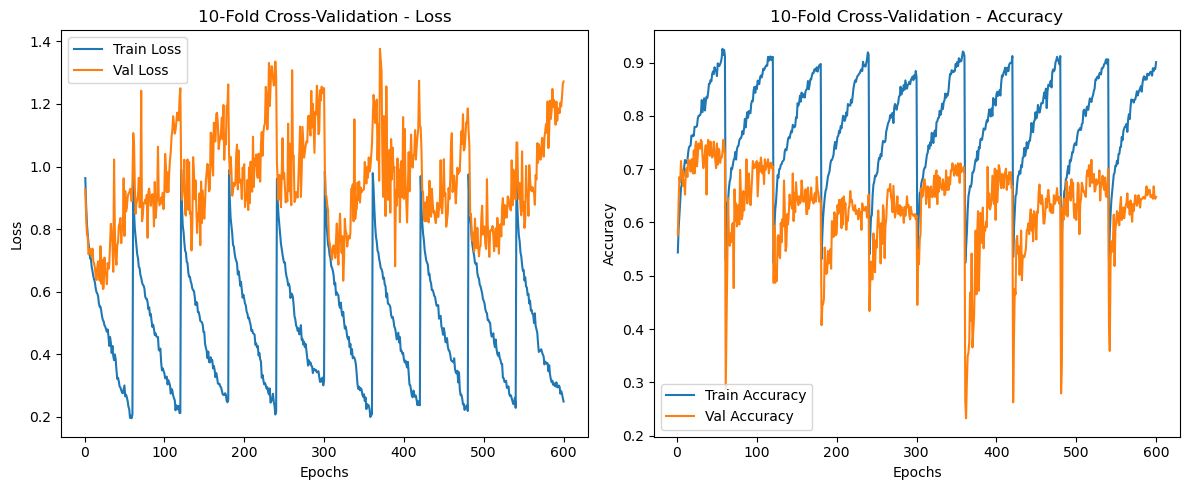

In [9]:
multi_cross_validate_10fold(num_classes = 3,type = ['eeg','eda'], data = segments ,kernels = [[3,9],[13]],samples = [2560,1280], num_feature_maps = [32,16], res_blocks = [7,7], in_channels = [4,3],learning_rate = 1e-3)

Fold 1, Epoch 1: Train Loss: 0.9527, Train Acc: 0.5496, Train F1: 0.4799, Val Loss: 0.9606, Val Acc: 0.5530, Val F1: 0.5571
Fold 1, Epoch 2: Train Loss: 0.8063, Train Acc: 0.6366, Train F1: 0.6231, Val Loss: 0.9651, Val Acc: 0.5033, Val F1: 0.5087
Fold 1, Epoch 3: Train Loss: 0.7558, Train Acc: 0.6620, Train F1: 0.6541, Val Loss: 0.8129, Val Acc: 0.6457, Val F1: 0.6478
Fold 1, Epoch 4: Train Loss: 0.7050, Train Acc: 0.6900, Train F1: 0.6843, Val Loss: 0.7416, Val Acc: 0.6755, Val F1: 0.6793
Fold 1, Epoch 5: Train Loss: 0.6628, Train Acc: 0.7173, Train F1: 0.7132, Val Loss: 0.6590, Val Acc: 0.6954, Val F1: 0.6938
Fold 1, Epoch 6: Train Loss: 0.6371, Train Acc: 0.7188, Train F1: 0.7146, Val Loss: 0.6769, Val Acc: 0.7086, Val F1: 0.7090
Fold 1, Epoch 7: Train Loss: 0.6136, Train Acc: 0.7475, Train F1: 0.7449, Val Loss: 0.7253, Val Acc: 0.6755, Val F1: 0.6774
Fold 1, Epoch 8: Train Loss: 0.5763, Train Acc: 0.7541, Train F1: 0.7518, Val Loss: 0.7268, Val Acc: 0.6457, Val F1: 0.6380
Fold 1, 

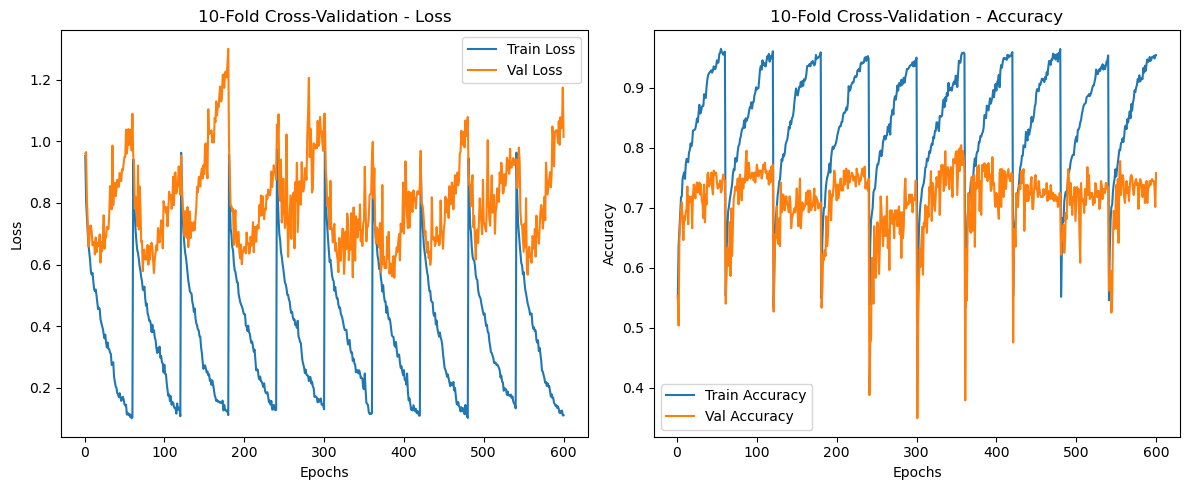

In [8]:
multi_cross_validate_10fold(num_classes = 3,type = ['eeg','ecg'], data = segments ,kernels = [[3,9],[5,11]],samples = [2560,5120], num_feature_maps = [32,32], res_blocks = [7,8], in_channels = [4,3],learning_rate = 1e-3)

Epoch 1: Train Loss: 0.9696, Train Acc: 0.5416, Train F1: 0.4517, Val Loss: 0.9394, Val Acc: 0.5663, Val F1: 0.4763
Epoch 2: Train Loss: 0.8572, Train Acc: 0.5985, Train F1: 0.5512, Val Loss: 0.8722, Val Acc: 0.5825, Val F1: 0.5401
Epoch 3: Train Loss: 0.8047, Train Acc: 0.6406, Train F1: 0.6203, Val Loss: 0.8176, Val Acc: 0.6117, Val F1: 0.5888
Epoch 4: Train Loss: 0.7556, Train Acc: 0.6590, Train F1: 0.6450, Val Loss: 0.8776, Val Acc: 0.5858, Val F1: 0.5583
Epoch 5: Train Loss: 0.7212, Train Acc: 0.6896, Train F1: 0.6804, Val Loss: 1.0443, Val Acc: 0.5534, Val F1: 0.4905
Epoch 6: Train Loss: 0.7114, Train Acc: 0.6849, Train F1: 0.6761, Val Loss: 0.8655, Val Acc: 0.5696, Val F1: 0.5670
Epoch 7: Train Loss: 0.6764, Train Acc: 0.6979, Train F1: 0.6906, Val Loss: 0.7807, Val Acc: 0.6117, Val F1: 0.6001
Epoch 8: Train Loss: 0.6633, Train Acc: 0.7137, Train F1: 0.7059, Val Loss: 0.7559, Val Acc: 0.6505, Val F1: 0.6458
Epoch 9: Train Loss: 0.6481, Train Acc: 0.7105, Train F1: 0.7058, Val Lo

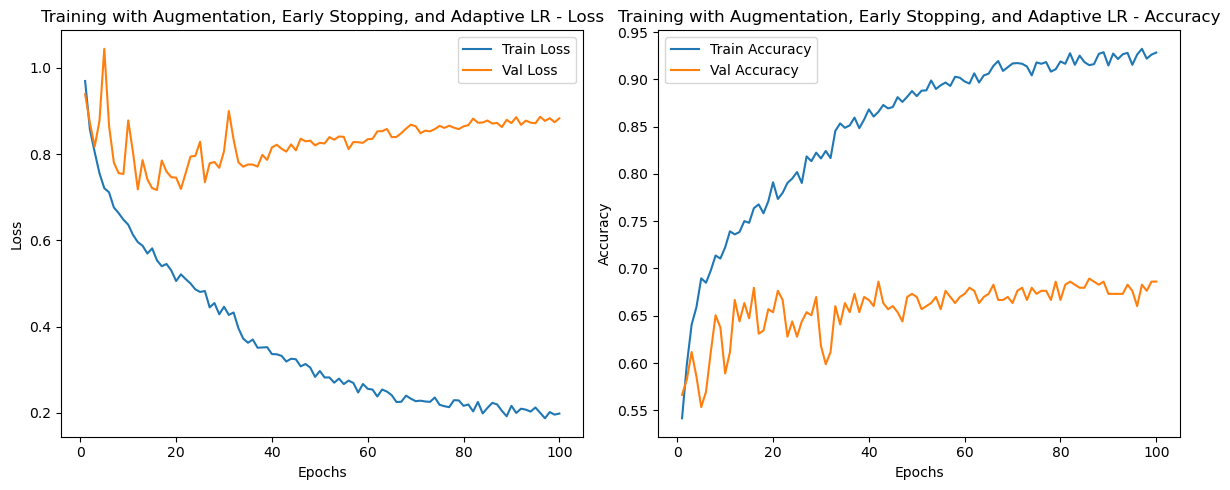

In [4]:
#CBAM depthwise
model,result = train_test_split_pipeline(num_classes = 3,type = 'eeg', data  = eeg_segments, kernels = [3,9], num_feature_maps = 64, res_blocks = 8, in_channels = 4,lr_scheduler= True)

Epoch 1: Train Loss: 1.0075, Train Acc: 0.5269, Train F1: 0.4166, Val Loss: 1.0244, Val Acc: 0.5177, Val F1: 0.3691
Epoch 2: Train Loss: 0.9879, Train Acc: 0.5462, Train F1: 0.4254, Val Loss: 1.0250, Val Acc: 0.5048, Val F1: 0.3742
Epoch 3: Train Loss: 0.9849, Train Acc: 0.5452, Train F1: 0.4254, Val Loss: 1.0227, Val Acc: 0.5080, Val F1: 0.3761
Epoch 4: Train Loss: 0.9846, Train Acc: 0.5444, Train F1: 0.4245, Val Loss: 1.0257, Val Acc: 0.5080, Val F1: 0.3681
Epoch 5: Train Loss: 0.9792, Train Acc: 0.5441, Train F1: 0.4213, Val Loss: 1.0185, Val Acc: 0.5080, Val F1: 0.3722
Epoch 6: Train Loss: 0.9698, Train Acc: 0.5473, Train F1: 0.4301, Val Loss: 1.0302, Val Acc: 0.5080, Val F1: 0.3591
Epoch 7: Train Loss: 0.9664, Train Acc: 0.5502, Train F1: 0.4409, Val Loss: 1.0216, Val Acc: 0.5048, Val F1: 0.3475
Epoch 8: Train Loss: 0.9626, Train Acc: 0.5523, Train F1: 0.4416, Val Loss: 1.0054, Val Acc: 0.5016, Val F1: 0.3762
Epoch 9: Train Loss: 0.9676, Train Acc: 0.5462, Train F1: 0.4467, Val Lo

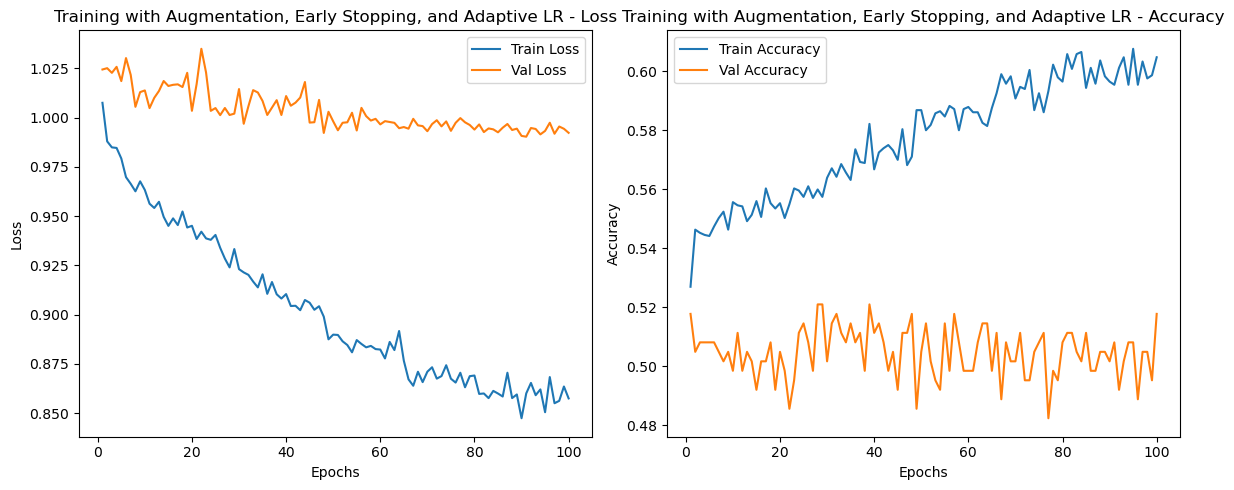

In [6]:
model,result = train_test_split_pipeline(num_classes = 3,type = 'eda', data  = eda_segments, kernels = [13], num_feature_maps = 32, res_blocks = 7, in_channels = 3,lr_scheduler= True)

Fold 1, Epoch 1: Train Loss: 0.9593, Train Acc: 0.5438, Train F1: 0.4488, Val Loss: 1.0406, Val Acc: 0.5146, Val F1: 0.3601
Fold 1, Epoch 2: Train Loss: 0.8633, Train Acc: 0.5898, Train F1: 0.5279, Val Loss: 1.0786, Val Acc: 0.4984, Val F1: 0.4254
Fold 1, Epoch 3: Train Loss: 0.8156, Train Acc: 0.6266, Train F1: 0.5971, Val Loss: 0.9958, Val Acc: 0.4725, Val F1: 0.4463
Fold 1, Epoch 4: Train Loss: 0.7700, Train Acc: 0.6665, Train F1: 0.6528, Val Loss: 0.9279, Val Acc: 0.5372, Val F1: 0.5193
Fold 1, Epoch 5: Train Loss: 0.7505, Train Acc: 0.6658, Train F1: 0.6557, Val Loss: 1.1203, Val Acc: 0.4628, Val F1: 0.4534
Fold 1, Epoch 6: Train Loss: 0.7220, Train Acc: 0.6788, Train F1: 0.6701, Val Loss: 0.9985, Val Acc: 0.4984, Val F1: 0.4938
Fold 1, Epoch 7: Train Loss: 0.7066, Train Acc: 0.6972, Train F1: 0.6911, Val Loss: 1.2130, Val Acc: 0.4401, Val F1: 0.4349
Fold 1, Epoch 8: Train Loss: 0.6871, Train Acc: 0.6950, Train F1: 0.6893, Val Loss: 0.9638, Val Acc: 0.5275, Val F1: 0.5307
Fold 1, 

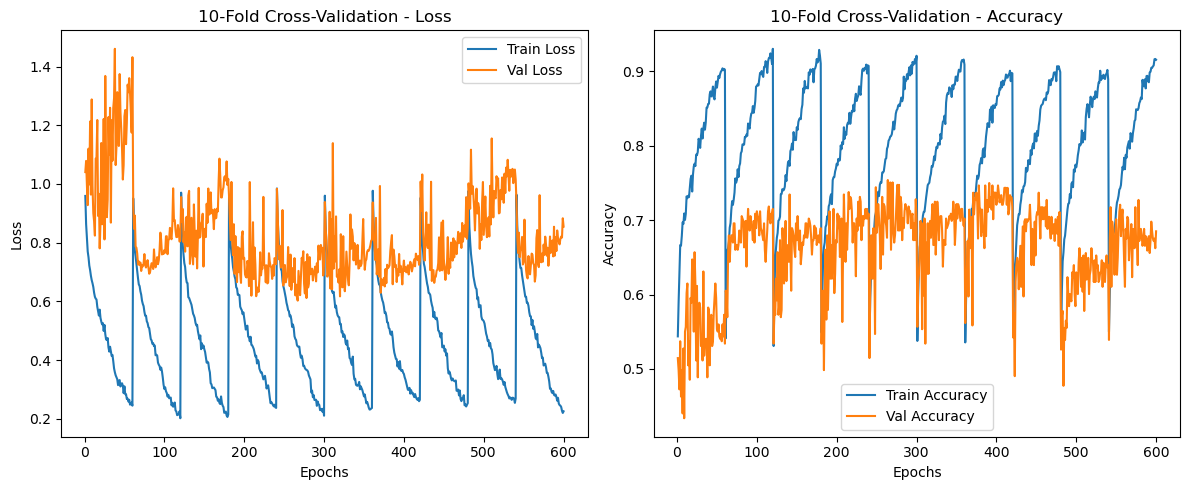

In [7]:
cross_validate_10fold(num_classes = 3,type = 'eeg', data  = eeg_segments, kernels = [3,9], num_feature_maps = 64, res_blocks = 8, in_channels = 4)

Fold 1, Epoch 1: Train Loss: 0.6285, Train Acc: 0.6543, Train F1: 0.6435, Val Loss: 0.6072, Val Acc: 0.6796, Val F1: 0.6585
Fold 1, Epoch 2: Train Loss: 0.5711, Train Acc: 0.6979, Train F1: 0.6892, Val Loss: 0.5737, Val Acc: 0.6926, Val F1: 0.6559
Fold 1, Epoch 3: Train Loss: 0.5277, Train Acc: 0.7339, Train F1: 0.7285, Val Loss: 0.6656, Val Acc: 0.6375, Val F1: 0.5456
Fold 1, Epoch 4: Train Loss: 0.5098, Train Acc: 0.7436, Train F1: 0.7406, Val Loss: 0.5510, Val Acc: 0.7120, Val F1: 0.6824
Fold 1, Epoch 5: Train Loss: 0.4809, Train Acc: 0.7641, Train F1: 0.7613, Val Loss: 0.5247, Val Acc: 0.7346, Val F1: 0.7166
Fold 1, Epoch 6: Train Loss: 0.4704, Train Acc: 0.7721, Train F1: 0.7694, Val Loss: 0.4793, Val Acc: 0.7896, Val F1: 0.7834
Fold 1, Epoch 7: Train Loss: 0.4563, Train Acc: 0.7843, Train F1: 0.7828, Val Loss: 0.4935, Val Acc: 0.7832, Val F1: 0.7810
Fold 1, Epoch 8: Train Loss: 0.4474, Train Acc: 0.7944, Train F1: 0.7930, Val Loss: 0.4842, Val Acc: 0.7702, Val F1: 0.7628
Fold 1, 

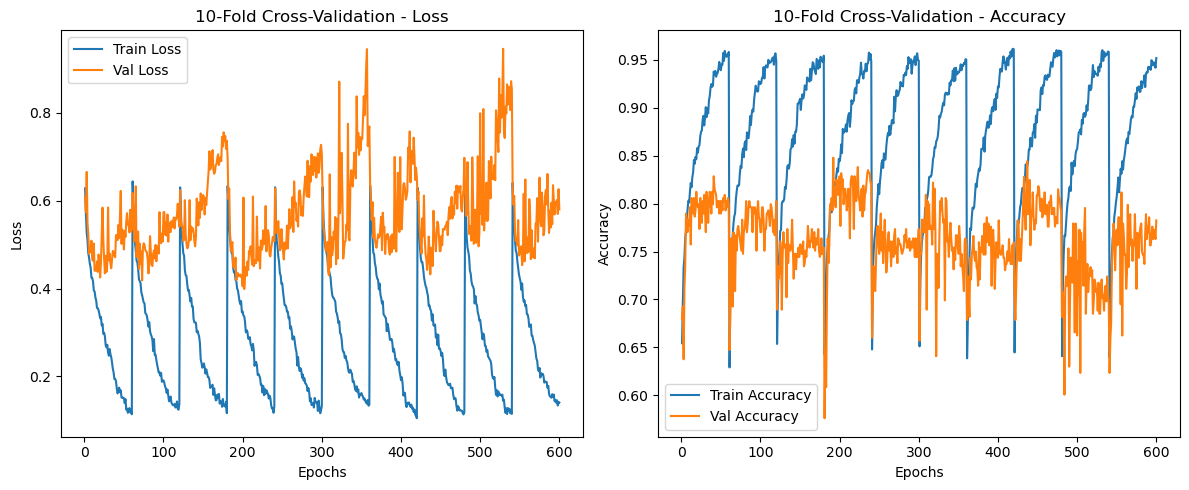

In [3]:
cross_validate_10fold(num_classes = 2,type = 'eeg', data  = eeg_segments, kernels = [3,9], num_feature_maps = 64, res_blocks = 8, in_channels = 4)

Epoch 1: Train Loss: 0.6605, Train Acc: 0.6118, Train F1: 0.5431, Val Loss: 0.6617, Val Acc: 0.6238, Val F1: 0.5191
Epoch 2: Train Loss: 0.6572, Train Acc: 0.6179, Train F1: 0.5530, Val Loss: 0.6548, Val Acc: 0.6206, Val F1: 0.5251
Epoch 3: Train Loss: 0.6539, Train Acc: 0.6204, Train F1: 0.5526, Val Loss: 0.6517, Val Acc: 0.6367, Val F1: 0.5607
Epoch 4: Train Loss: 0.6501, Train Acc: 0.6233, Train F1: 0.5727, Val Loss: 0.6592, Val Acc: 0.6270, Val F1: 0.5253
Epoch 5: Train Loss: 0.6435, Train Acc: 0.6254, Train F1: 0.5871, Val Loss: 0.6720, Val Acc: 0.6302, Val F1: 0.5314
Epoch 6: Train Loss: 0.6498, Train Acc: 0.6222, Train F1: 0.5660, Val Loss: 0.6464, Val Acc: 0.6334, Val F1: 0.5757
Epoch 7: Train Loss: 0.6449, Train Acc: 0.6355, Train F1: 0.5998, Val Loss: 0.6446, Val Acc: 0.6463, Val F1: 0.6064
Epoch 8: Train Loss: 0.6398, Train Acc: 0.6441, Train F1: 0.6100, Val Loss: 0.6416, Val Acc: 0.6399, Val F1: 0.5905
Epoch 9: Train Loss: 0.6402, Train Acc: 0.6337, Train F1: 0.6015, Val Lo

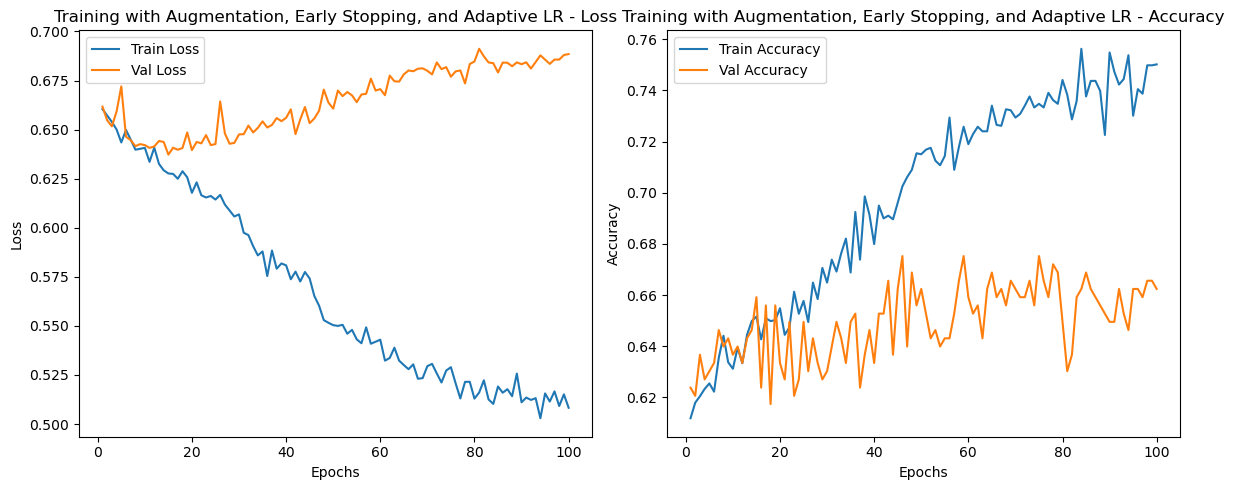

In [9]:
model,result = train_test_split_pipeline(num_classes = 2,type = 'eda', data  = eda_segments, kernels = [13], num_feature_maps = 64, res_blocks = 7, in_channels = 3,lr_scheduler= True)